In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Nutrition.csv to Nutrition.csv
User uploaded file "Nutrition.csv" with length 33203588 bytes


In [3]:
dataset = pd.read_csv('Nutrition.csv')
nutrition_data = pd.DataFrame(dataset)

In [4]:
nutrition_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [5]:
nutrition_data.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,88629.000000,88629.000000,0.0,79851.000000,79851.000000,79851.000000,79851.000000,79851.000000,88629.000000
mean,2016.011362,2016.011362,NaN,31.236493,31.236493,26.907732,36.135953,3656.809044,30.906475
std,3.121080,3.121080,NaN,10.113829,10.113829,9.907896,11.061591,18706.392637,17.485456
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2013.000000,2013.000000,NaN,24.300000,24.300000,20.000000,28.600000,516.000000,17.000000
50%,2016.000000,2016.000000,NaN,31.200000,31.200000,26.800000,35.900000,1109.000000,30.000000
75%,2019.000000,2019.000000,NaN,37.000000,37.000000,32.900000,42.200000,2408.000000,45.000000
max,2021.000000,2021.000000,NaN,77.600000,77.600000,70.200000,87.700000,476876.000000,78.000000


In [6]:
# Based on the displayed data, let's perform cleaning and preprocessing

# Dropping columns with high missing values or irrelevant information
columns_to_drop = ['Data_Value_Unit', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
                   'Data_Value_Footnote', 'Total', 'Age(years)', 'Gender', 'Race/Ethnicity']
nutrition_data_cleaned = nutrition_data.drop(columns=columns_to_drop)

# Handling GeoLocation: Splitting into two separate columns for latitude and longitude
nutrition_data_cleaned[['Latitude', 'Longitude']] = nutrition_data_cleaned['GeoLocation'].str.strip('()').str.split(', ', expand=True)

# Converting GeoLocation coordinates to numeric
nutrition_data_cleaned['Latitude'] = pd.to_numeric(nutrition_data_cleaned['Latitude'], errors='coerce')
nutrition_data_cleaned['Longitude'] = pd.to_numeric(nutrition_data_cleaned['Longitude'], errors='coerce')

# Dropping original GeoLocation column
nutrition_data_cleaned.drop(columns=['GeoLocation'], inplace=True)

# Removing rows with missing 'Data_Value' as it is a key metric for analysis
nutrition_data_cleaned = nutrition_data_cleaned.dropna(subset=['Data_Value'])

# Convert 'YearStart' and 'YearEnd' to datetime
nutrition_data_cleaned['YearStart'] = pd.to_datetime(nutrition_data_cleaned['YearStart'], format='%Y')
nutrition_data_cleaned['YearEnd'] = pd.to_datetime(nutrition_data_cleaned['YearEnd'], format='%Y')

# Checking the data after cleaning
nutrition_data_cleaned.head(1)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Latitude,Longitude
0,2020-01-01,2020-01-01,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,...,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS,NaN,NaN


In [7]:
# Displaying all column names to identify the correct ones
print(nutrition_data_cleaned.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Education', 'Income', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1',
       'Latitude', 'Longitude'],
      dtype='object')


In [8]:
# Imputing missing values for numeric columns
nutrition_data_cleaned['Low_Confidence_Limit'].fillna(nutrition_data_cleaned['Low_Confidence_Limit'].median(), inplace=True)
nutrition_data_cleaned['High_Confidence_Limit '].fillna(nutrition_data_cleaned['High_Confidence_Limit '].median(), inplace=True)  # Note the space in the column name
nutrition_data_cleaned['Sample_Size'].fillna(nutrition_data_cleaned['Sample_Size'].median(), inplace=True)

# Filling missing values for categorical columns with 'Unknown'
categorical_columns = ['Education', 'Income']
for col in categorical_columns:
    nutrition_data_cleaned[col].fillna('Unknown', inplace=True)

# Handling missing values in Latitude and Longitude
nutrition_data_cleaned['Latitude'].fillna(0, inplace=True)  # or another placeholder/strategy as appropriate
nutrition_data_cleaned['Longitude'].fillna(0, inplace=True)  # or another placeholder/strategy as appropriate

# Recheck missing values
updated_missing_values = nutrition_data_cleaned.isnull().sum()
updated_missing_values

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Type              0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
Education                    0
Income                       0
ClassID                      0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
LocationID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
Latitude                     0
Longitude                    0
dtype: int64

In [9]:
nutrition_data_cleaned['LocationAbbr'].unique()

array(['US', 'GU', 'WY', 'DC', 'PR', 'AL', 'RI', 'DE', 'NJ', 'WA', 'ME',
       'MI', 'VA', 'CA', 'UT', 'NY', 'MA', 'AR', 'IL', 'NH', 'NM', 'MD',
       'MN', 'HI', 'LA', 'SD', 'TX', 'CO', 'OK', 'MS', 'OR', 'WV', 'WI',
       'KS', 'FL', 'ID', 'AZ', 'VI', 'MT', 'GA', 'NC', 'PA', 'KY', 'ND',
       'SC', 'NE', 'MO', 'NV', 'IA', 'IN', 'OH', 'VT', 'TN', 'CT', 'AK'],
      dtype=object)

In [10]:
# Checking the number of unique values in each column
unique_values = nutrition_data_cleaned.nunique()

# Display columns with a very low number of unique values (e.g., less than 2)
low_variability_columns = unique_values[unique_values < 2].index.tolist()
print("Columns with low variability:", low_variability_columns)

# Optionally, drop these low variability columns
nutrition_data_cleaned.drop(columns=low_variability_columns, inplace=True)


Columns with low variability: ['Datasource', 'Data_Value_Type', 'DataValueTypeID']


In [11]:
# Identifying outliers using IQR
Q1 = nutrition_data_cleaned['Data_Value'].quantile(0.25)
Q3 = nutrition_data_cleaned['Data_Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers (Example: Removing outliers)
nutrition_data_cleaned = nutrition_data_cleaned[
    (nutrition_data_cleaned['Data_Value'] >= lower_bound) &
    (nutrition_data_cleaned['Data_Value'] <= upper_bound)
]

In [12]:
# Feature Engineering and Encoding

# Combining Categories in StratificationCategory1 and Stratification1
# Example: Binning Income Levels
income_bins = {'Less than $15,000': 'Low Income',
               '$15,000 - $24,999': 'Low Income',
               '$25,000 - $34,999': 'Middle Income',
               '$35,000 - $49,999': 'Middle Income',
               '$50,000 - $74,999': 'High Income',
               '$75,000 or greater': 'High Income'}

nutrition_data_cleaned['Income_Level'] = nutrition_data_cleaned['Stratification1'].map(income_bins)

# Interaction Features
# Example: Creating an interaction feature between 'Class' and 'Education'
nutrition_data_cleaned['Class_Education'] = nutrition_data_cleaned['Class'] + "_" + nutrition_data_cleaned['Stratification1']

# Location-Based Features
# Example: Categorizing states into regions (this requires a mapping of states to regions)
# This is a placeholder example. You should define the actual regions and states.
region_mapping = {'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West', 'CO': 'West', 'CT': 'Northeast',
                  'DE': 'South', 'FL': 'South', 'GA': 'South', 'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest',
                  'IA': 'Midwest', 'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
                  'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest', 'MT': 'West',
                  'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West', 'NY': 'Northeast',
                  'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast',
                  'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West',
                  'VT': 'Northeast', 'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West'}

nutrition_data_cleaned['Region'] = nutrition_data_cleaned['LocationAbbr'].map(region_mapping)

# Encoding Categorical Variables
# One-Hot Encoding for 'Class' and 'Topic'
nutrition_data_encoded = pd.get_dummies(nutrition_data_cleaned, columns=['Class', 'Topic'])

# Label Encoding or Binning for 'Stratification1' (Income Level and Age Group)
# Here we are using the previously created 'Income_Level' for simplicity
# For a more detailed approach, you could use specific encoding or binning strategies

# Reviewing the transformed data
nutrition_data_encoded.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Education,...,Longitude,Income_Level,Class_Education,Region,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,Topic_Fruits and Vegetables - Behavior,Topic_Obesity / Weight Status,Topic_Physical Activity - Behavior
0,2020-01-01,2020-01-01,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,Unknown,...,0.000000,NaN,Physical Activity_Hispanic,NaN,0,0,1,0,0,1
1,2014-01-01,2014-01-01,GU,Guam,Percent of adults aged 18 years and older who ...,29.3,25.7,33.3,842.0,High school graduate,...,144.793731,NaN,Obesity / Weight Status_High school graduate,NaN,0,1,0,0,1,0
2,2013-01-01,2013-01-01,US,National,Percent of adults aged 18 years and older who ...,28.8,28.1,29.5,62562.0,Unknown,...,0.000000,High Income,"Obesity / Weight Status_$50,000 - $74,999",NaN,0,1,0,0,1,0
3,2013-01-01,2013-01-01,US,National,Percent of adults aged 18 years and older who ...,32.7,31.9,33.5,60069.0,Unknown,...,0.000000,NaN,Obesity / Weight Status_Data not reported,NaN,0,1,0,0,1,0
4,2015-01-01,2015-01-01,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,Unknown,...,0.000000,Low Income,"Physical Activity_Less than $15,000",NaN,0,0,1,0,0,1


Summary Statistics:
          Data_Value  Low_Confidence_Limit  High_Confidence_Limit   \
count  78287.000000          78287.000000            78287.000000   
mean      30.708583             26.397149               35.607108   
std        9.339888              9.158694               10.360466   
min        5.300000              1.300000                6.300000   
25%       24.200000             19.900000               28.500000   
50%       31.000000             26.600000               35.700000   
75%       36.700000             32.500000               41.800000   
max       56.000000             54.600000               77.400000   

         Sample_Size    LocationID      Latitude     Longitude  \
count   78287.000000  78287.000000  78287.000000  78287.000000   
mean     3672.680969     30.598924     38.174498    -87.884203   
std     18833.276236     17.151057      9.081392     35.407358   
min        50.000000      1.000000      0.000000   -157.857749   
25%       516.000000     17

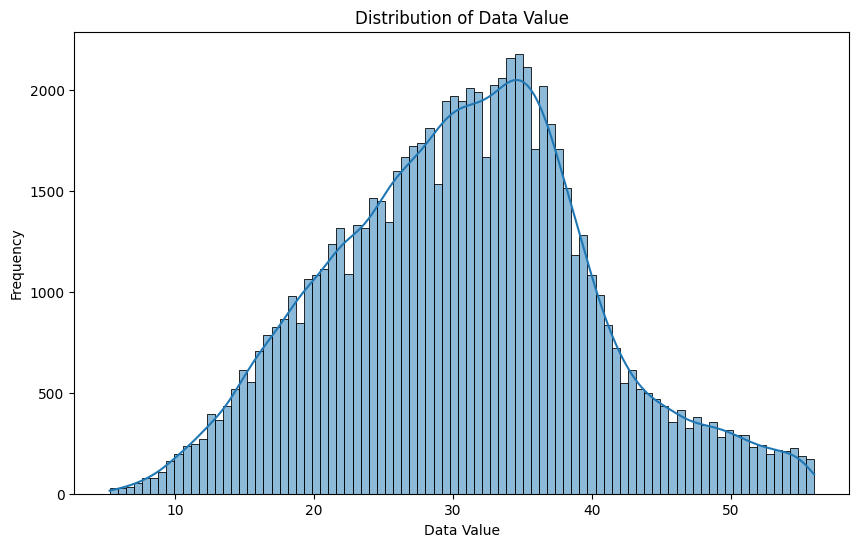

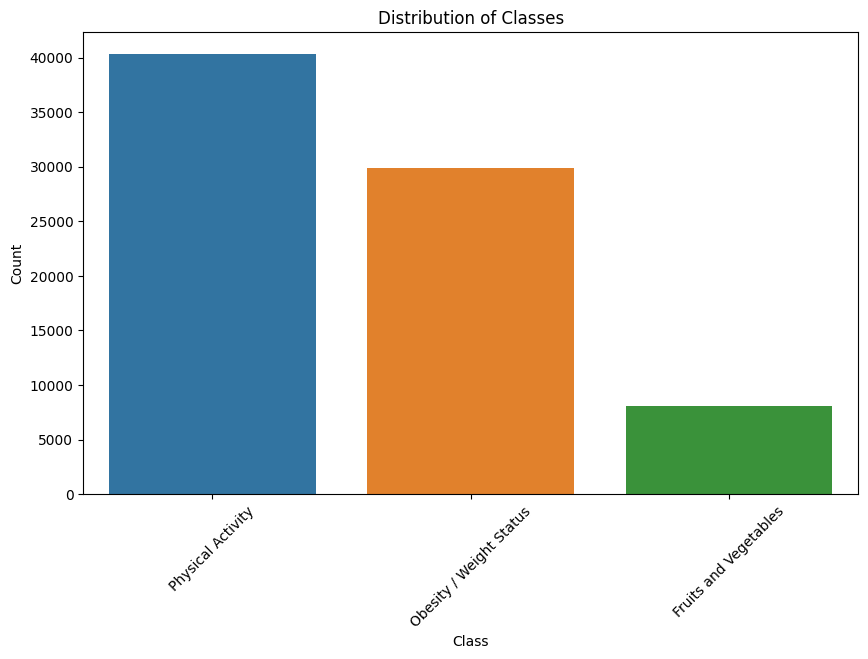

<ipython-input-13-745034ad9a8e>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nutrition_data_cleaned.corr(), annot=True, cmap='coolwarm')


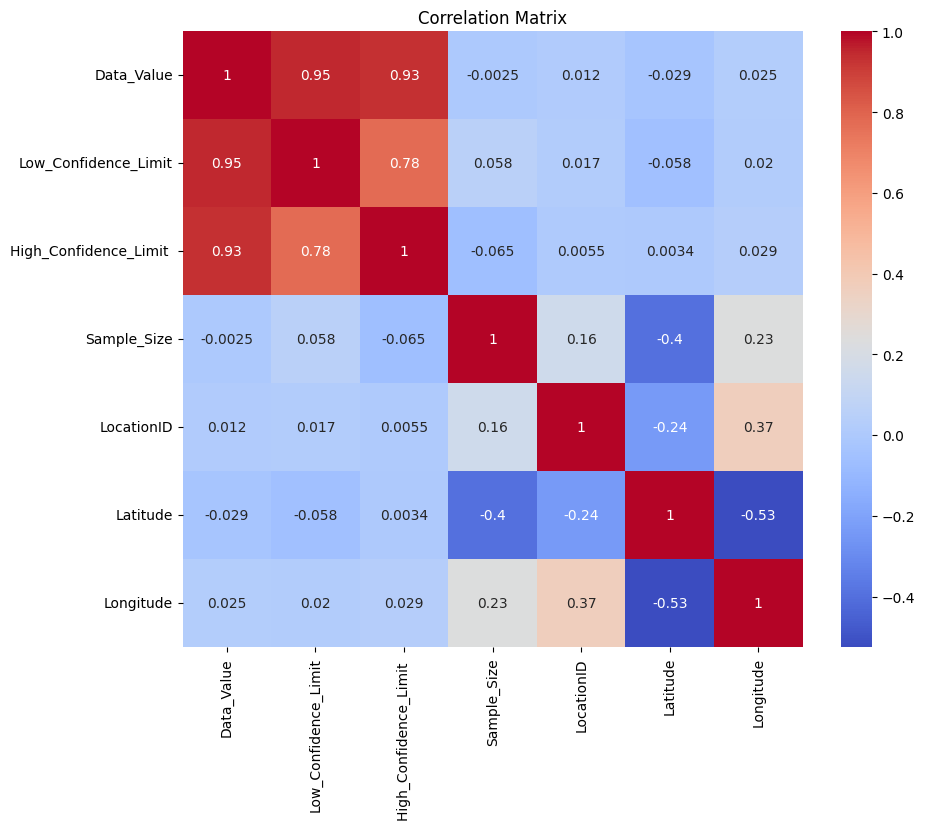

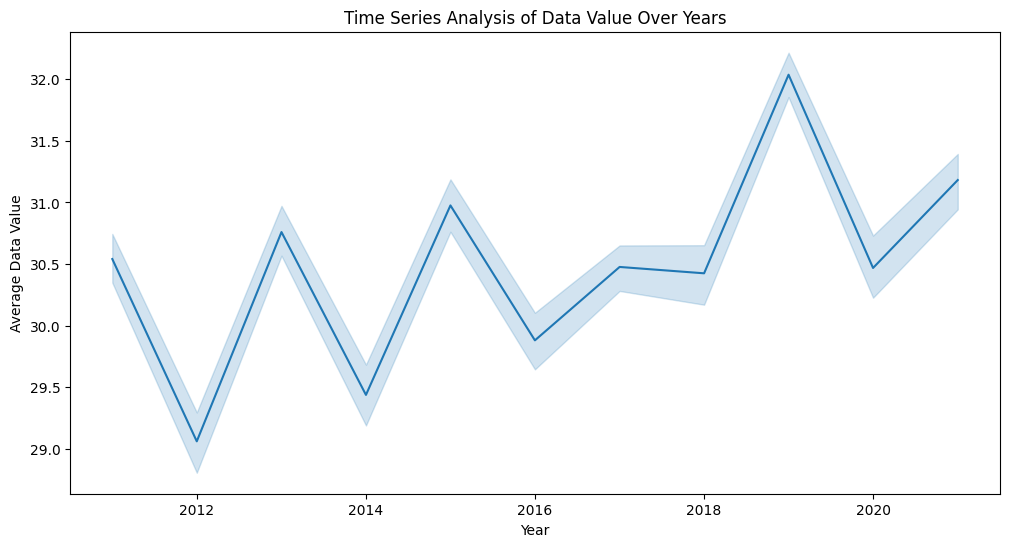

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print("Summary Statistics:\n", nutrition_data_encoded.describe())

# Distribution of Key Variables
# Replace 'Data_Value' with any numerical column of interest
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_data_cleaned['Data_Value'], kde=True)
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

# Categorical Data Analysis
# Replace 'Class' with any categorical column of interest
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=nutrition_data_cleaned)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(nutrition_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis (if applicable)
# This requires a time-based column, like 'YearStart'
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearStart', y='Data_Value', data=nutrition_data_cleaned, estimator='mean')
plt.title('Time Series Analysis of Data Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.show()


In [14]:
#1. ANOVA Test for Geographic Variation

import scipy.stats as stats

# Assuming 'Data_Value' is the variable of interest and 'Region' is already defined
regions = nutrition_data_cleaned['Region'].unique()
anova_data = [nutrition_data_cleaned[nutrition_data_cleaned['Region'] == region]['Data_Value'] for region in regions if region != 'Unknown']

anova_result = stats.f_oneway(*anova_data)
print("ANOVA Test for Geographic Variation: F-value =", anova_result.statistic, ", P-value =", anova_result.pvalue)


ANOVA Test for Geographic Variation: F-value = nan , P-value = nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
